## Heart Disease UCI

In this project I used multiple Machine Learning algorithms to predict whether a person is suffering from a heart disease. The dataset used for this the [Kaggle Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci) set.

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow
%matplotlib inline
warnings.filterwarnings('ignore')

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# All the metrics for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

For processing the data, I'm utilizing sklearn's built in functionalities for splitting the dataset and to scale the features.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

To have a better understanding, I tried out several ML approaches, which are imported here.

In [3]:
from sklearn.neighbors import KNeighborsClassifier  #K Neighbors Classifier
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier

### Exploratory Data Analysis


In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print('Null Values \n')
df.isnull().sum()

Null Values 



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Features

* age - in years
* sex - 1 = male; 0 = female
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

#### Correlacion map to check feature dependence

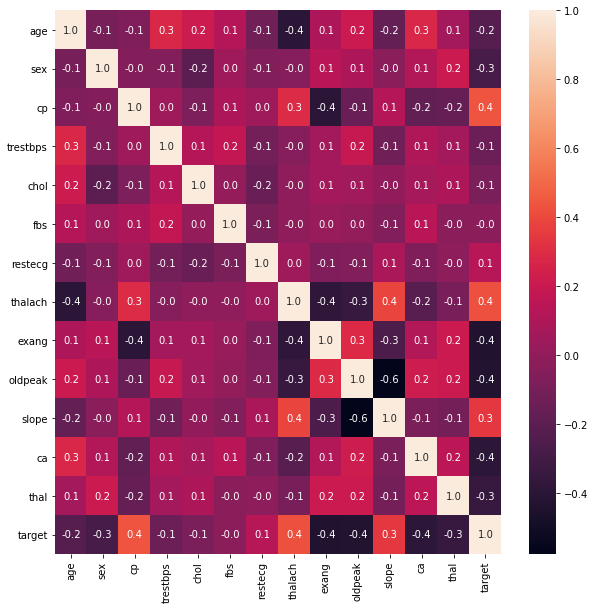

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

#### Checking for class inbalance

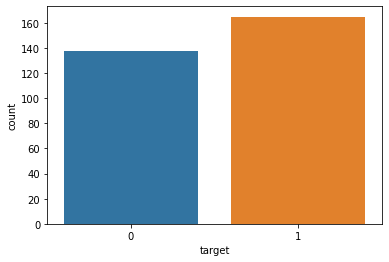

In [9]:
sns.countplot(x="target", data=df)
plt.show()

The classes are not exactly 50%-50% but the defference between the classes is not disproportional.

#### Class inbalance in sex

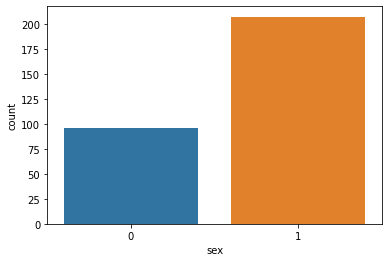

In [10]:
#Sex (1 = male; 0 = female)
sns.countplot(df.sex)
plt.show()

In [11]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
all_ = len(df.sex)
print("Percentage of Female Patients: {:.2f}%".format((countFemale / all_*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / all_*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


There is a bigger inbalance regarding sex, which could introduce some problems later. For now I leave it this way, but one should keep this in mind during evaluation and when putting it into production.

In [12]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


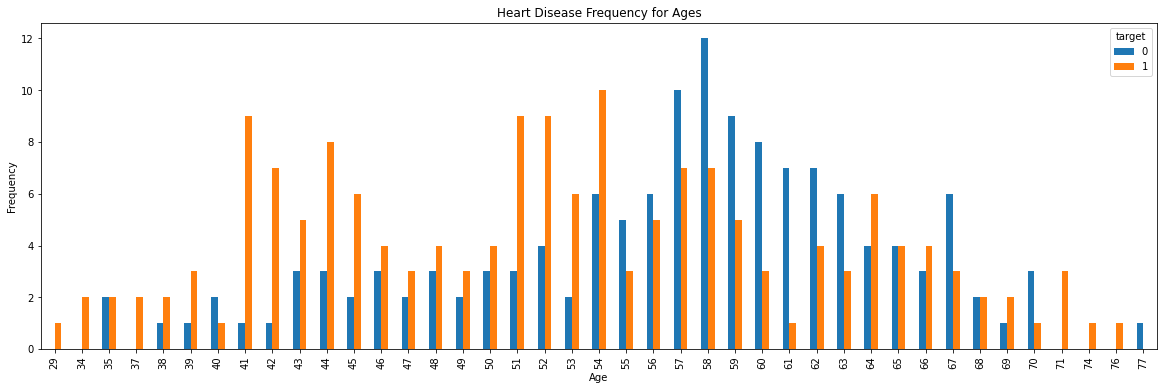

In [13]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Creating Dummy Variables and Scale values

In [14]:
categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
prep_data = pd.get_dummies(df,columns=categorical_variables)
prep_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [15]:
standardscaler = StandardScaler()
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
prep_data[features_to_scale] = standardscaler.fit_transform(prep_data[features_to_scale])

In [16]:
prep_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Train and test set

In [17]:
X = prep_data.drop('target', axis=1)
y = prep_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Training

In [18]:
#function that will print out all the important details about each training
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        cm=confusion_matrix(y_train,pred)
        sns.heatmap(cm,annot=True)
        plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        cm=confusion_matrix(y_test,pred)
        sns.heatmap(cm,annot=True)
        plt.show()

### 1. K-Nearest Neighbors

Train Result:
Accuracy Score: 83.96%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.853933    0.829268  0.839623    0.841600      0.840553
recall      0.783505    0.886957  0.839623    0.835231      0.839623
f1-score    0.817204    0.857143  0.839623    0.837174      0.838869
support    97.000000  115.000000  0.839623  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 76  21]
 [ 13 102]]



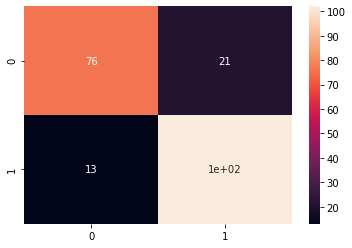

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.850000   0.862745  0.857143   0.856373      0.857003
recall      0.829268   0.880000  0.857143   0.854634      0.857143
f1-score    0.839506   0.871287  0.857143   0.855397      0.856968
support    41.000000  50.000000  0.857143  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 6 44]]



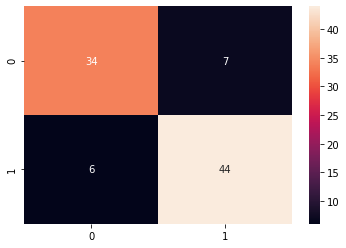

In [32]:
knn_clf = KNeighborsClassifier(n_neighbors=15) #only hyperparameter
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best params: {'n_neighbors': 5}
Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.863158    0.871795  0.867925    0.867476      0.867843
recall      0.845361    0.886957  0.867925    0.866159      0.867925
f1-score    0.854167    0.879310  0.867925    0.866739      0.867806
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]



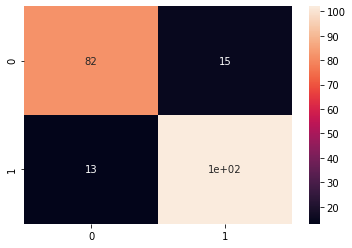

Test Result:
Accuracy Score: 86.81%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.853659   0.88  0.868132   0.866829      0.868132
recall      0.853659   0.88  0.868132   0.866829      0.868132
f1-score    0.853659   0.88  0.868132   0.866829      0.868132
support    41.000000  50.00  0.868132  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



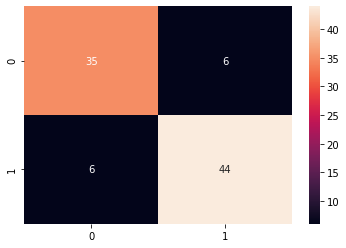

In [35]:
knn_clf = KNeighborsClassifier(n_neighbors=15)

params = {"n_neighbors":(3, 5, 10, 15, 20, 25)}

knn_cv = GridSearchCV(knn_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
knn_cv.fit(X_train, y_train)
best_params = knn_cv.best_params_
print(f"Best params: {best_params}")

knn_clf_tuned = KNeighborsClassifier(**best_params)
knn_clf_tuned.fit(X_train, y_train)

print_score(knn_clf_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf_tuned, X_train, y_train, X_test, y_test, train=False)

### 2. Support Vector Classifier

Train Result:
Accuracy Score: 93.40%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.936842    0.931624  0.933962    0.934233      0.934011
recall      0.917526    0.947826  0.933962    0.932676      0.933962
f1-score    0.927083    0.939655  0.933962    0.933369      0.933903
support    97.000000  115.000000  0.933962  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 89   8]
 [  6 109]]



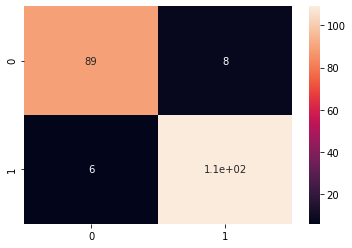

Test Result:
Accuracy Score: 87.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.857143   0.897959  0.879121   0.877551      0.879569
recall      0.878049   0.880000  0.879121   0.879024      0.879121
f1-score    0.867470   0.888889  0.879121   0.878179      0.879239
support    41.000000  50.000000  0.879121  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[36  5]
 [ 6 44]]



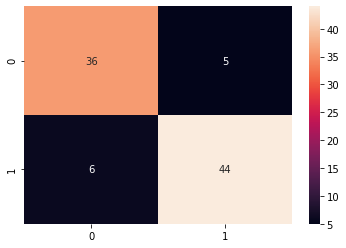

In [20]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

#### Hyperparameter tuning

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best params: {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 87.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.881720    0.873950  0.877358    0.877835      0.877505
recall      0.845361    0.904348  0.877358    0.874854      0.877358
f1-score    0.863158    0.888889  0.877358    0.876023      0.877116
support    97.000000  115.000000  0.877358  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 11 104]]



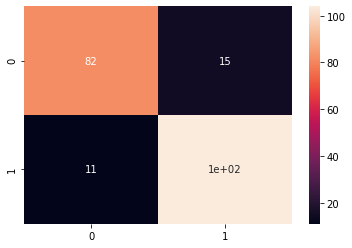

Test Result:
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.846154   0.846154  0.846154   0.846154      0.846154
recall      0.804878   0.880000  0.846154   0.842439      0.846154
f1-score    0.825000   0.862745  0.846154   0.843873      0.845739
support    41.000000  50.000000  0.846154  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 6 44]]



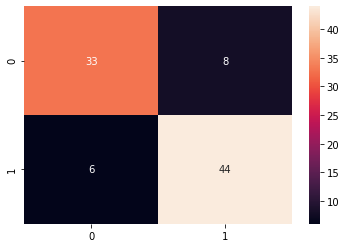

In [21]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20, 25), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 1.25), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf_tuned = SVC(**best_params)
svm_clf_tuned.fit(X_train, y_train)

print_score(svm_clf_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf_tuned, X_train, y_train, X_test, y_test, train=False)

### 3. Logistic Regression

Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.879121    0.859504  0.867925    0.869313      0.868480
recall      0.824742    0.904348  0.867925    0.864545      0.867925
f1-score    0.851064    0.881356  0.867925    0.866210      0.867496
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]



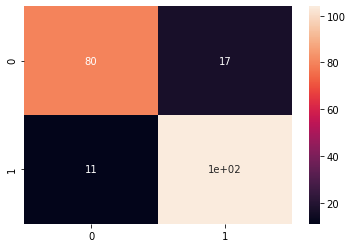

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.868421   0.849057  0.857143   0.858739      0.857781
recall      0.804878   0.900000  0.857143   0.852439      0.857143
f1-score    0.835443   0.873786  0.857143   0.854615      0.856511
support    41.000000  50.000000  0.857143  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 5 45]]



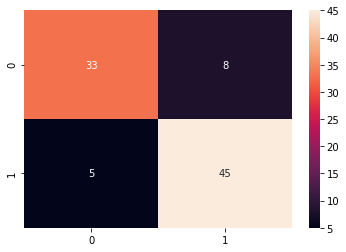

In [22]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

#### Hyperparameter tuning

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.23357214690901212, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 85.85%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.860215    0.857143  0.858491    0.858679      0.858549
recall      0.824742    0.886957  0.858491    0.855849      0.858491
f1-score    0.842105    0.871795  0.858491    0.856950      0.858210
support    97.000000  115.000000  0.858491  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 13 102]]



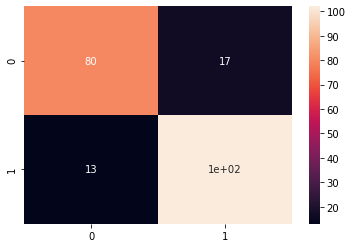

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.850000   0.862745  0.857143   0.856373      0.857003
recall      0.829268   0.880000  0.857143   0.854634      0.857143
f1-score    0.839506   0.871287  0.857143   0.855397      0.856968
support    41.000000  50.000000  0.857143  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 6 44]]



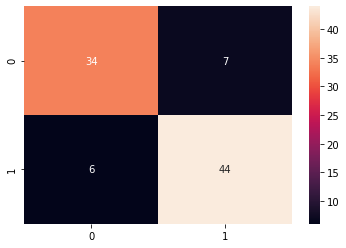

In [26]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf_tuned = LogisticRegression(**best_params)

lr_clf_tuned.fit(X_train, y_train)

print_score(lr_clf_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf_tuned, X_train, y_train, X_test, y_test, train=False)

### 4. Decision Tree Classifier

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]



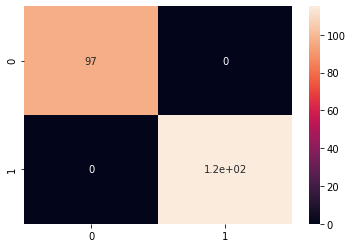

Test Result:
Accuracy Score: 74.73%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.695652   0.800000  0.747253   0.747826      0.752986
recall      0.780488   0.720000  0.747253   0.750244      0.747253
f1-score    0.735632   0.757895  0.747253   0.746763      0.747864
support    41.000000  50.000000  0.747253  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[32  9]
 [14 36]]



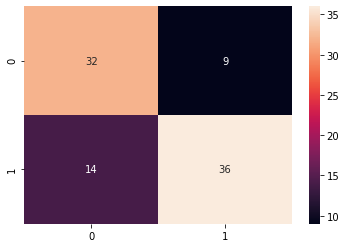

In [27]:
tree_clf = DecisionTreeClassifier(random_state=12)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

#### Hyperparameter tuning

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 88.68%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.892473    0.882353  0.886792    0.887413      0.886983
recall      0.855670    0.913043  0.886792    0.884357      0.886792
f1-score    0.873684    0.897436  0.886792    0.885560      0.886568
support    97.000000  115.000000  0.886792  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 83  14]
 [ 10 105]]



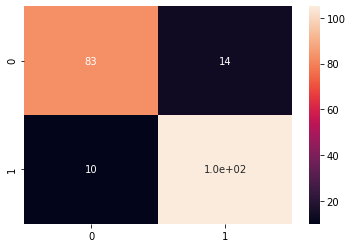

Test Result:
Accuracy Score: 78.02%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.723404   0.840909   0.78022   0.782157      0.787967
recall      0.829268   0.740000   0.78022   0.784634      0.780220
f1-score    0.772727   0.787234   0.78022   0.779981      0.780698
support    41.000000  50.000000   0.78022  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [13 37]]



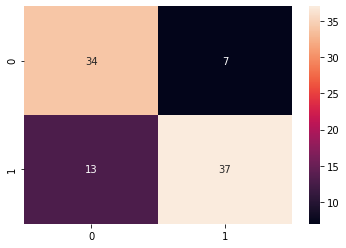

In [28]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf_tuned = DecisionTreeClassifier(**best_params)
tree_clf_tuned.fit(X_train, y_train)

print_score(tree_clf_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf_tuned, X_train, y_train, X_test, y_test, train=False)

### 5. Random Forest

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]



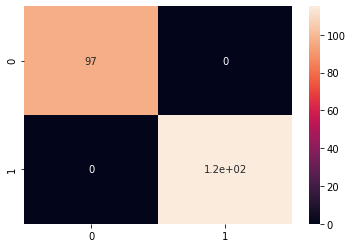

Test Result:
Accuracy Score: 82.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0      1  accuracy  macro avg  weighted avg
precision   0.804878   0.84  0.824176   0.822439      0.824176
recall      0.804878   0.84  0.824176   0.822439      0.824176
f1-score    0.804878   0.84  0.824176   0.822439      0.824176
support    41.000000  50.00  0.824176  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 8 42]]



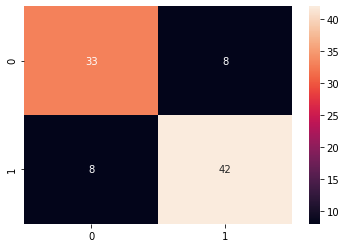

In [29]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=12)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

#### Hyperparameter tuning

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1100}
Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.887640    0.853659  0.867925    0.870649      0.869207
recall      0.814433    0.913043  0.867925    0.863738      0.867925
f1-score    0.849462    0.882353  0.867925    0.865908      0.867304
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 79  18]
 [ 10 105]]



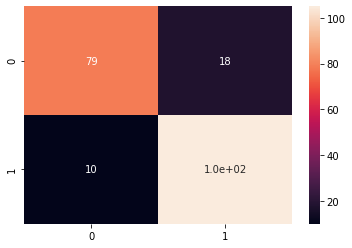

Test Result:
Accuracy Score: 84.62%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.846154   0.846154  0.846154   0.846154      0.846154
recall      0.804878   0.880000  0.846154   0.842439      0.846154
f1-score    0.825000   0.862745  0.846154   0.843873      0.845739
support    41.000000  50.000000  0.846154  91.000000     91.000000
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 6 44]]



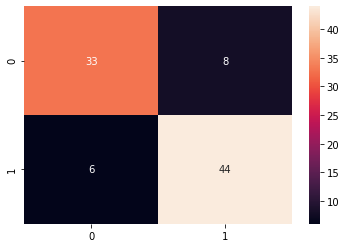

In [30]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

### Conclusion

In this project, I tried out several Machine Learning algorithms to predict whether a person is suffering from a heart disease. After loading the dataset all the analysis and data processing parts have been applied on the data. Then I used _K neighbors Classifier_ , _Support Vector Classifier_, _Logistic Regression_, _Decision Tree Classifier_ and _Random Forest Classifier_. I also tried to do hyperparameter tuning to improve the scores of the models.

We can see that we got pretty good results in the end and it is interesting to see that the K-Nearest Neighbors model performed the best out of all models after hyperparameter tuning with an accuracy of 86.81%.